<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


# Content:

1. [Importing modules and Loading datasets](#1)
1. [Feature Engineering](#2)
   1. [Removing the columns whose more than 30% data are missing](#3)
   1. [Filling Missing Data](#4)
   1. [Solving skewness of data](#5)
   1. [Encoding the categorical data](#6)
   1. [Correlations of each column](#7)
1. [Spliting Data](#8)
1. [Model selection and evaluation](#9)
    1. [DecisionTreeRegressor](#10)
    1. [ RandomForestRegressor](#11)
    1. [LinearRegression](#12)
    1. [GradientBoostingRegressor](#13)
    1. [ AdaBoostRegressor](#14)
    1. [XGBRegressor](#15)
1. [Conclusion](#16)   
1. [Prediction on test dataset](#17)

<a id="1"></a> 
## Importing modules and Loading datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.model_selection import GridSearchCV
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<a id="2"></a> 
# Feature Engineering

<a id="3"></a> 
### Removing the columns whose more than 30% data are missing

In [3]:
dropping_columns=[i for i in data.columns if (data[i].isnull().sum()/len(data))*100>30]
# dropping_columns.append('Id')
def drop_missing_columns(data):
    data.drop(dropping_columns,axis=1,inplace=True)
drop_missing_columns(data)

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


<a id="4"></a> 
## Filling Missing Data

In [6]:
missing_data_object_column=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype=='O']
missing_data_numeric_column=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype!='O' and data[i].nunique()>20]
missing_categorical=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype!='O' and data[i].nunique()<20]
missing_categorical_data=missing_categorical+missing_data_object_column
def removing_missing_value(data):
    for col in missing_categorical_data:
        data[col].fillna(method='ffill',inplace=True)
    for cols in missing_data_numeric_column:
        data[cols].fillna(value=np.mean(data[cols]),inplace=True)
removing_missing_value(data)

<a id="5"></a>
## Solving skewness of data

In [7]:
data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [8]:
numeric_skew_data_name=[i for i in data.columns if data[i].dtype!='O' and data[i].skew()>2.5]

In [9]:
#Removing normalizing skew data
def remove_skewness(data):
    for cols in numeric_skew_data_name:
        data[cols]=data[cols].apply(lambda x: np.log(x+1))
    return data
data=remove_skewness(data)

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,9.110966,6.099315,5.575342,1971.267808,1984.865753,2.145749,443.639726,...,94.244521,46.660274,0.698019,0.085679,0.410671,0.030431,0.233456,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,0.517369,1.382997,1.112799,30.202904,20.645407,2.630626,456.098091,...,125.338794,66.256028,1.727317,0.666876,1.403194,0.438685,1.226030,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,8.929898,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9.156887,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,9.358976,7.000000,6.000000,2000.000000,2004.000000,5.107456,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,5644.000000,...,857.000000,547.000000,6.315358,6.232448,6.175867,6.605298,9.648660,12.000000,2010.000000,755000.000000


<a id="6"></a>
## Encoding the categorical data

In [11]:
#categorical data
categories=[k for k in data.columns if data[k].dtype=='O']
encode=[]
dummy=[]
for col in categories:
    if data[col].nunique()<=5:
        dummy.append(col)
    else:
        encode.append(col)

lbl1=LabelEncoder()
lbl2=LabelEncoder()
lbl3=LabelEncoder()
lbl4=LabelEncoder()
lbl5=LabelEncoder()
lbl6=LabelEncoder()
lbl7=LabelEncoder()
lbl8=LabelEncoder()
lbl9=LabelEncoder()
lbl10=LabelEncoder()
lbl11=LabelEncoder()
lbl12=LabelEncoder()
lbl13=LabelEncoder()
lbl14=LabelEncoder()
lbl15=LabelEncoder()
lbl16=LabelEncoder()
def encodings(data):
    for dummi in dummy:
        variables=[]
        variables=pd.get_dummies(data[dummi],drop_first=True)
        data=pd.concat([data,variables],axis=1)
        data.drop([dummi],inplace=True,axis=1)
    data[encode[0]]=lbl1.fit_transform(data[encode[0]])
    data[encode[1]]=lbl2.fit_transform(data[encode[1]])
    data[encode[2]]=lbl3.fit_transform(data[encode[2]])
    data[encode[3]]=lbl4.fit_transform(data[encode[3]])
    data[encode[4]]=lbl5.fit_transform(data[encode[4]])
    data[encode[5]]=lbl6.fit_transform(data[encode[5]])
    data[encode[6]]=lbl7.fit_transform(data[encode[6]])
    data[encode[7]]=lbl8.fit_transform(data[encode[7]])
    data[encode[8]]=lbl9.fit_transform(data[encode[8]])
    data[encode[9]]=lbl10.fit_transform(data[encode[9]])
    data[encode[10]]=lbl11.fit_transform(data[encode[10]])
    data[encode[11]]=lbl12.fit_transform(data[encode[11]])
    data[encode[12]]=lbl13.fit_transform(data[encode[12]])
    data[encode[13]]=lbl14.fit_transform(data[encode[13]])
    data[encode[14]]=lbl15.fit_transform(data[encode[14]])
    data[encode[15]]=lbl16.fit_transform(data[encode[15]])
    return data
data=encodings(data)  

In [12]:
duplicate_columns = data.columns[data.columns.duplicated()]
def delete_duplicate_columns(data):
    data.drop(duplicate_columns,inplace=True,axis=1)
    
    return data
data=delete_duplicate_columns(data)

In [13]:
data.drop(['NoSeWa','Mix'],axis=1,inplace=True)

<a id="7"></a>
## Correlations of each column

In [14]:
correlation=data.corr()

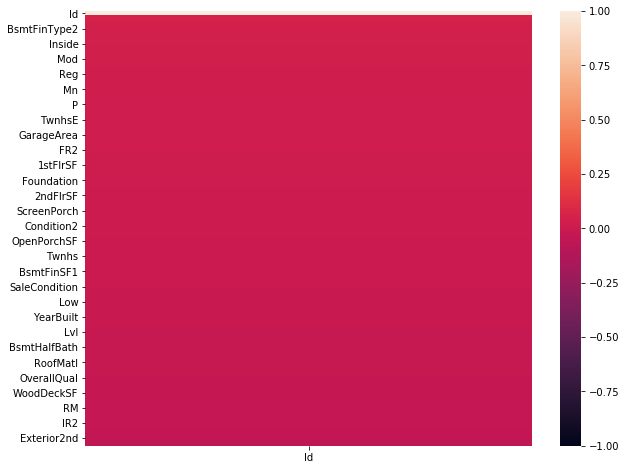

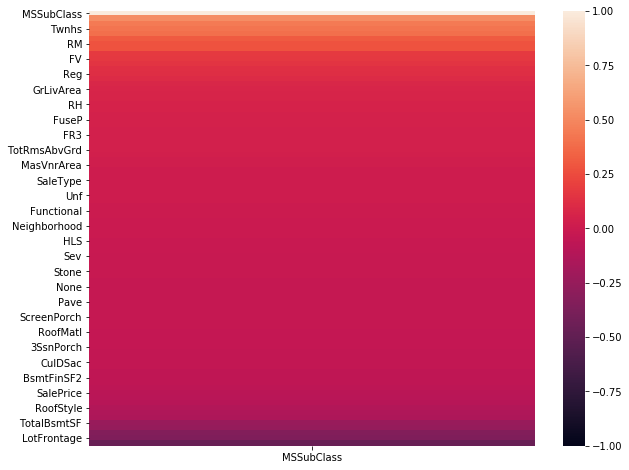

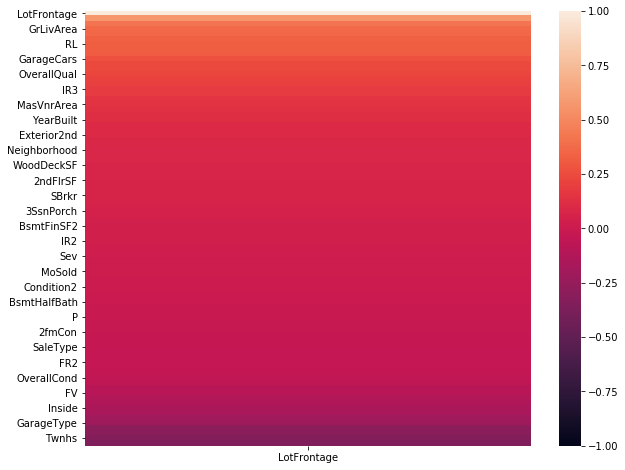

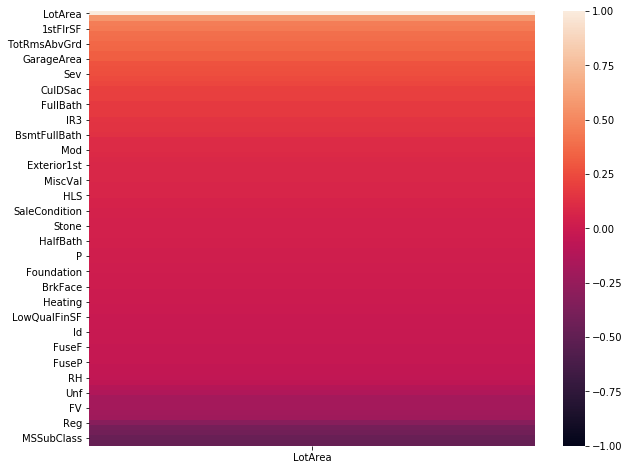

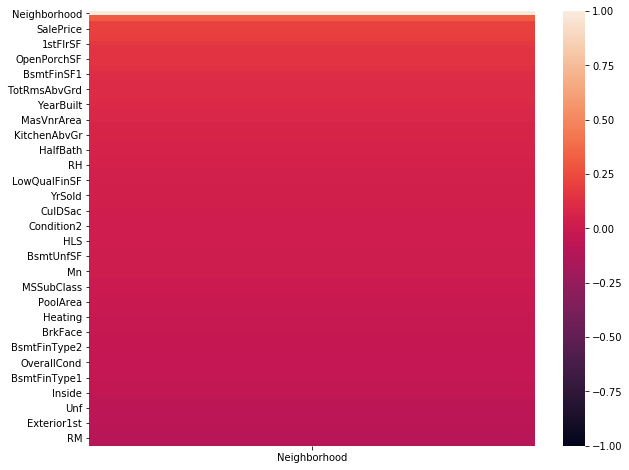

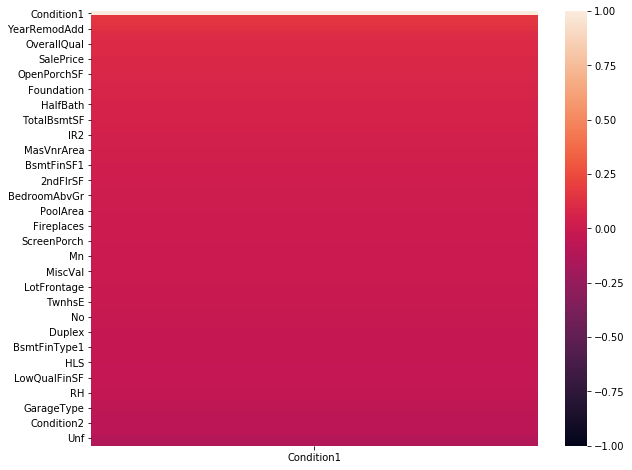

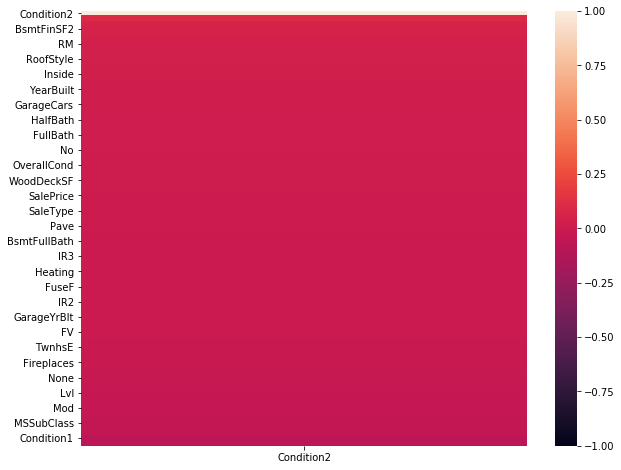

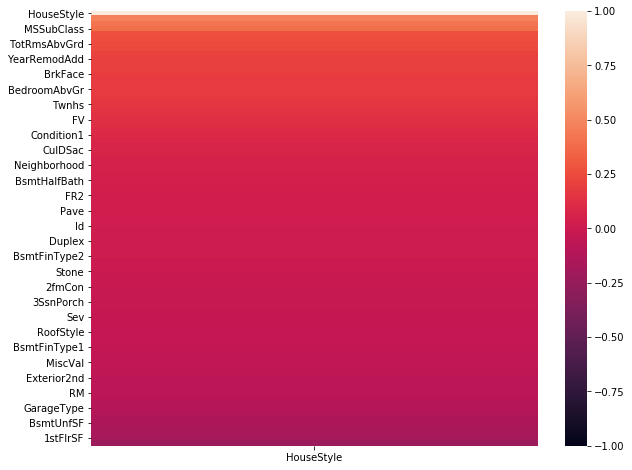

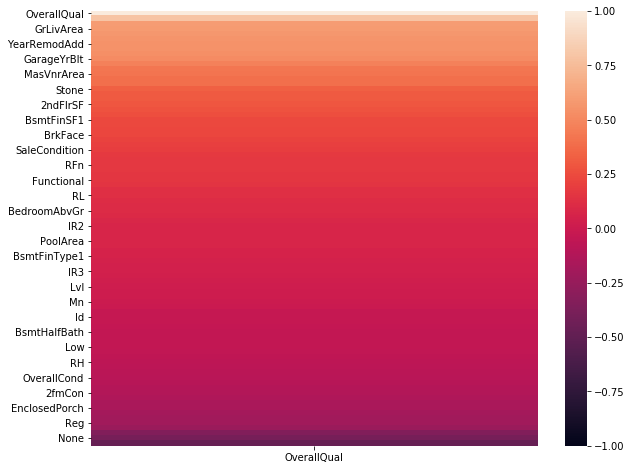

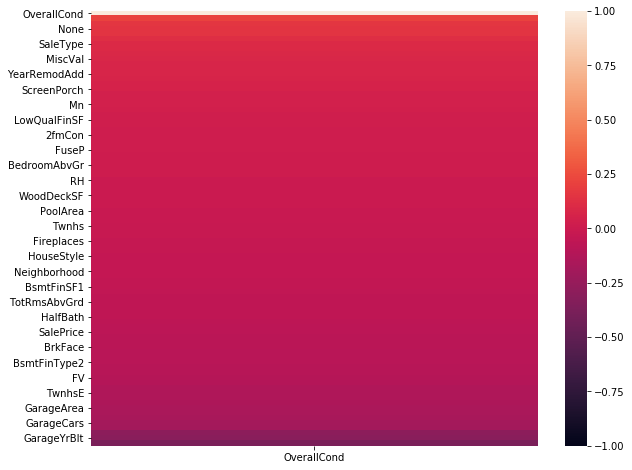

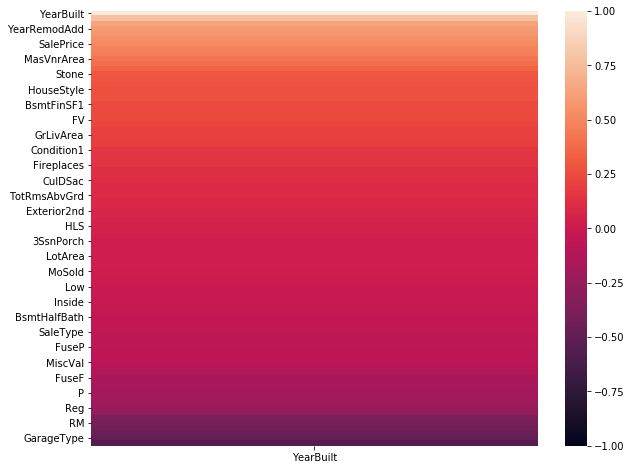

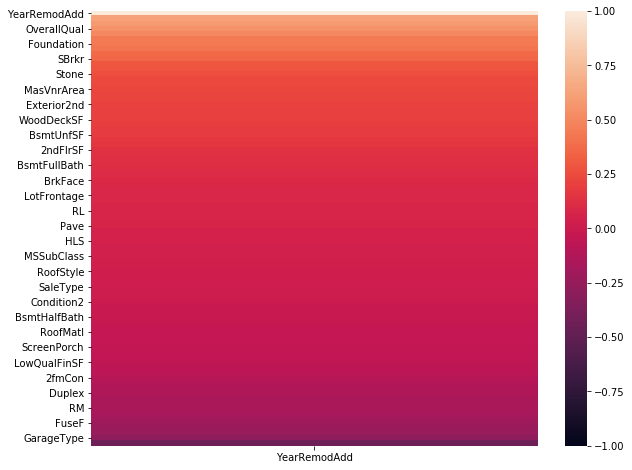

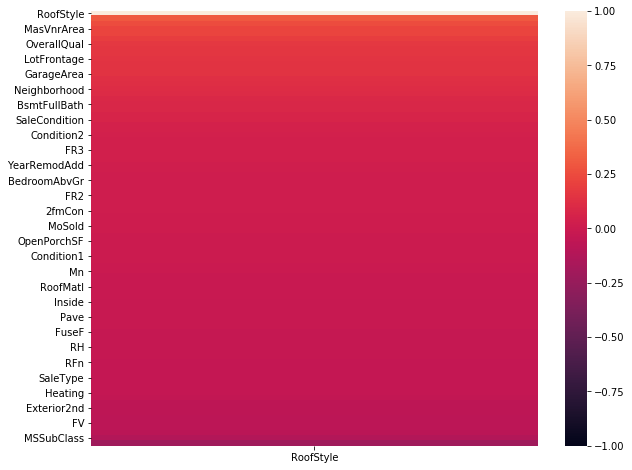

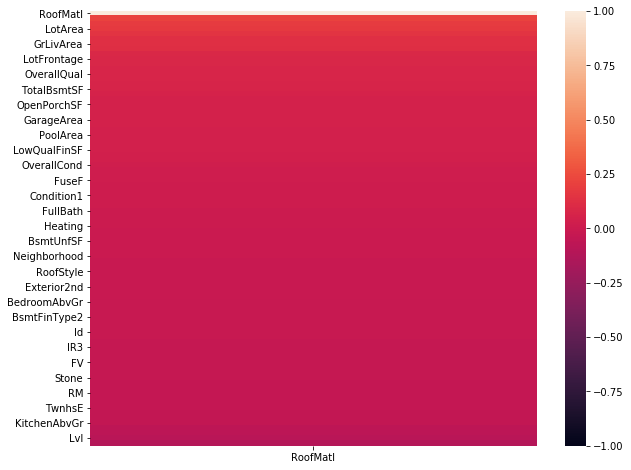

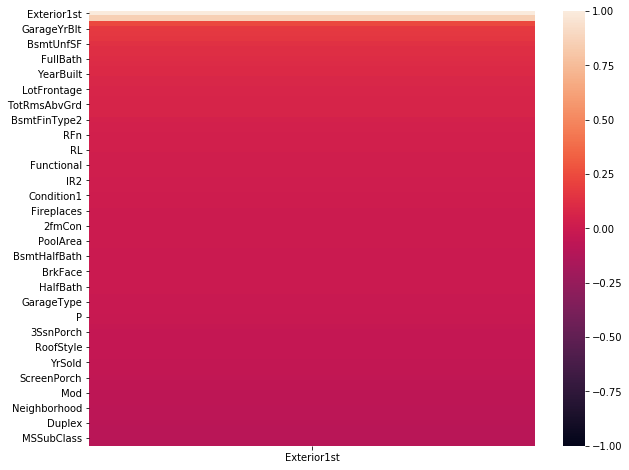

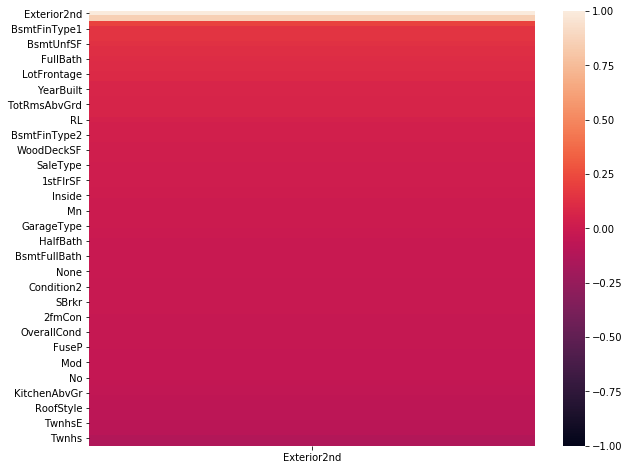

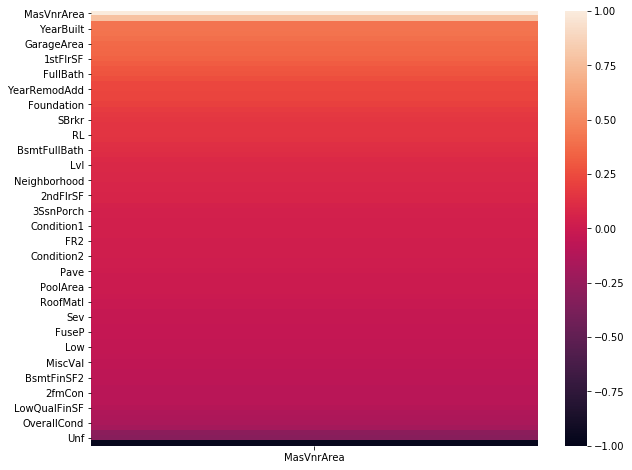

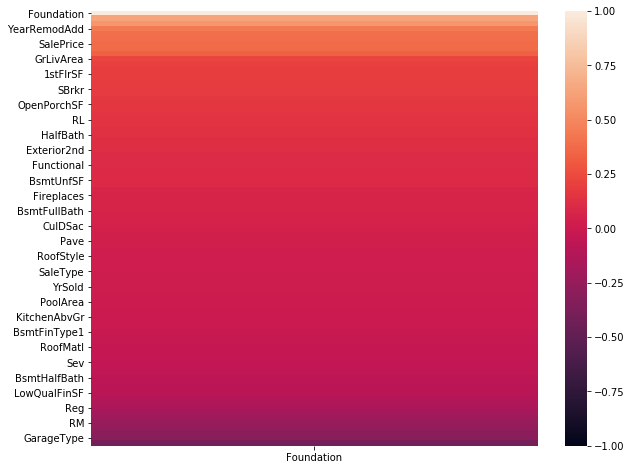

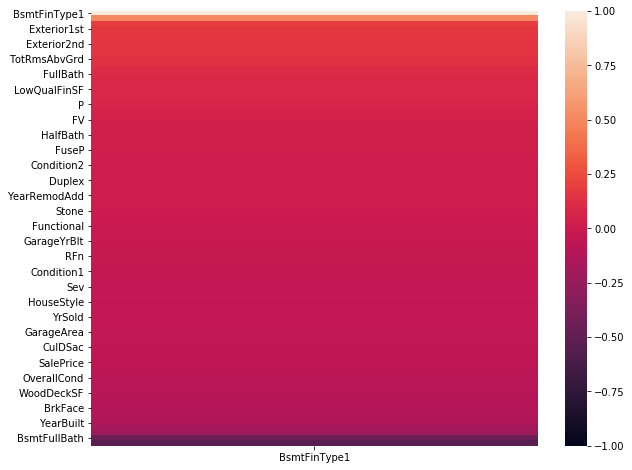

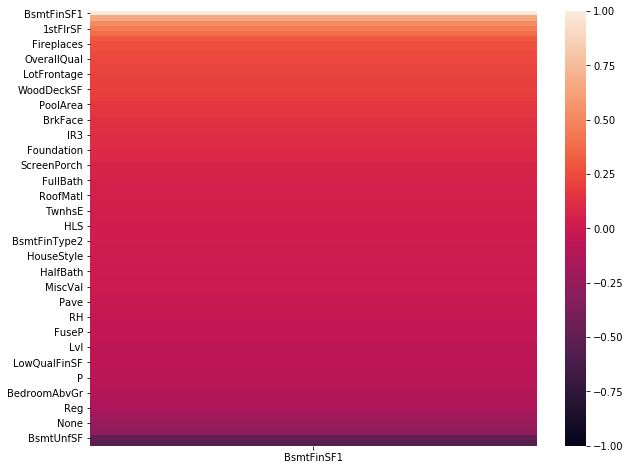

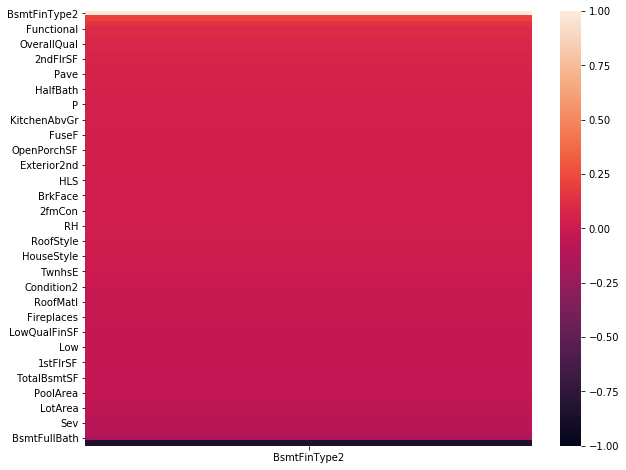

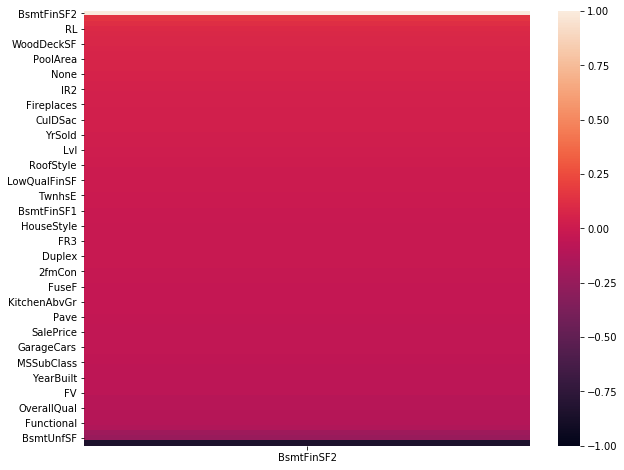

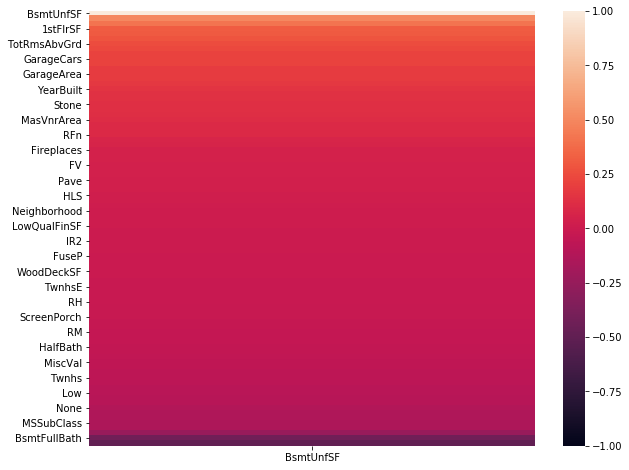

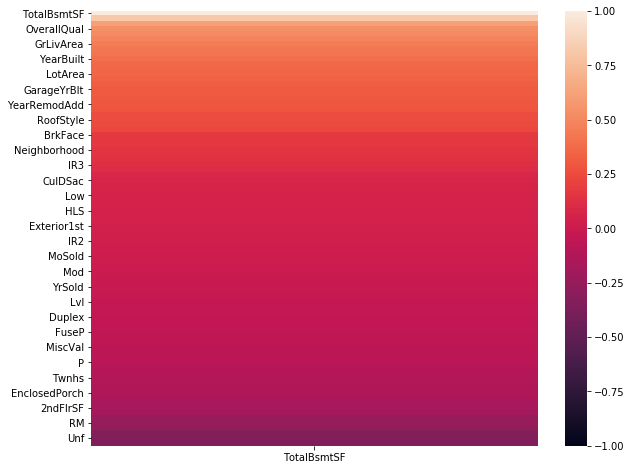

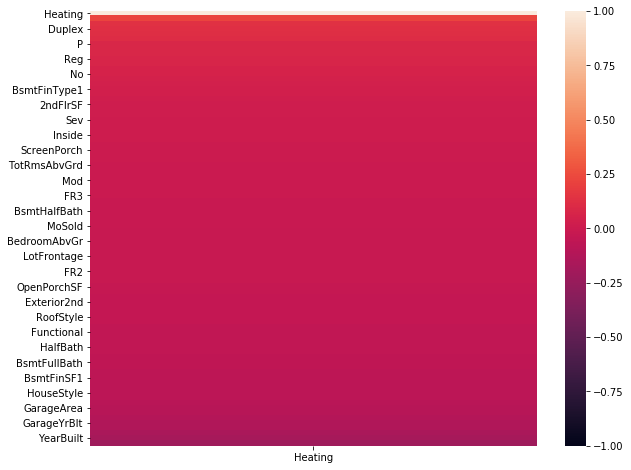

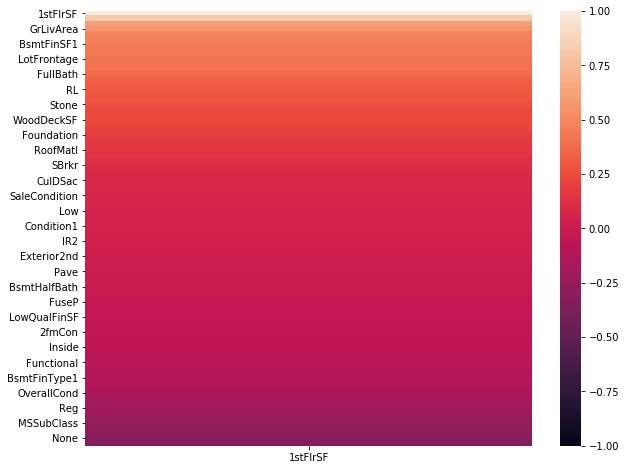

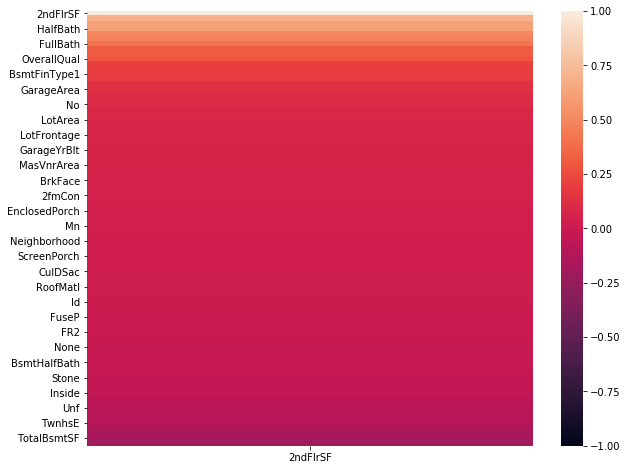

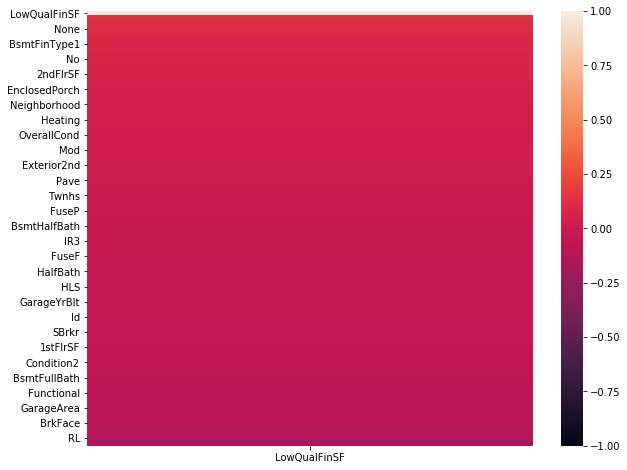

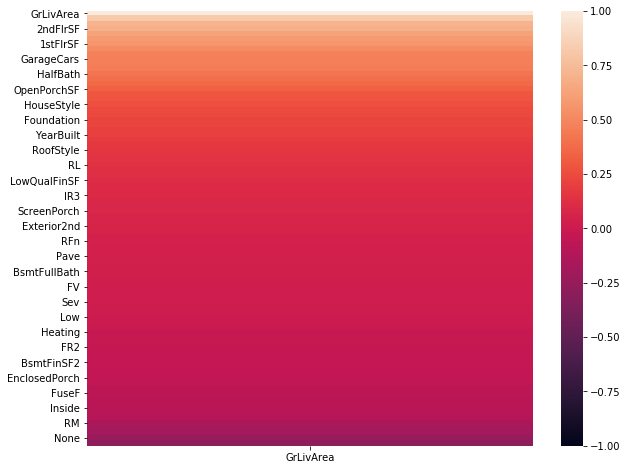

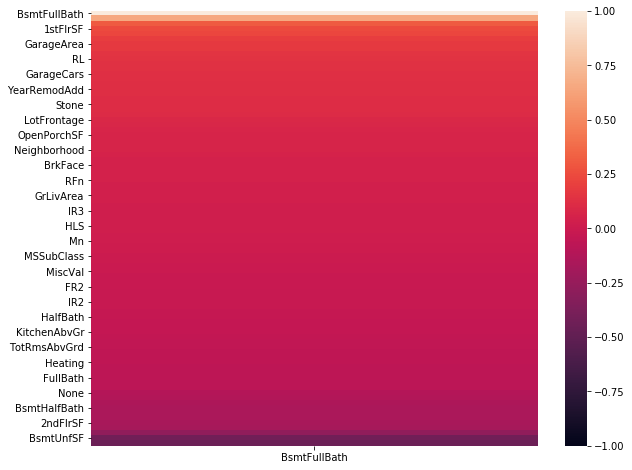

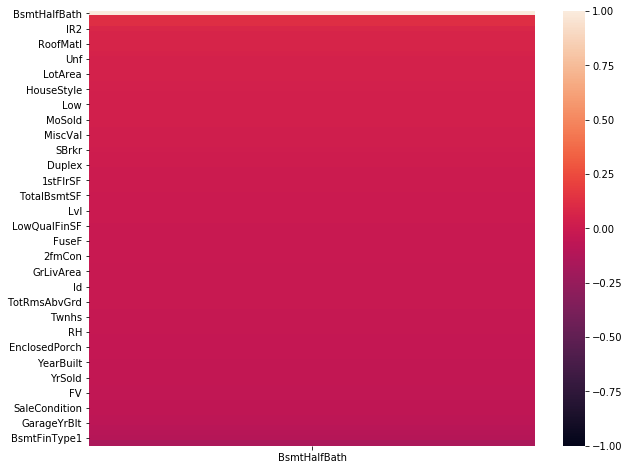

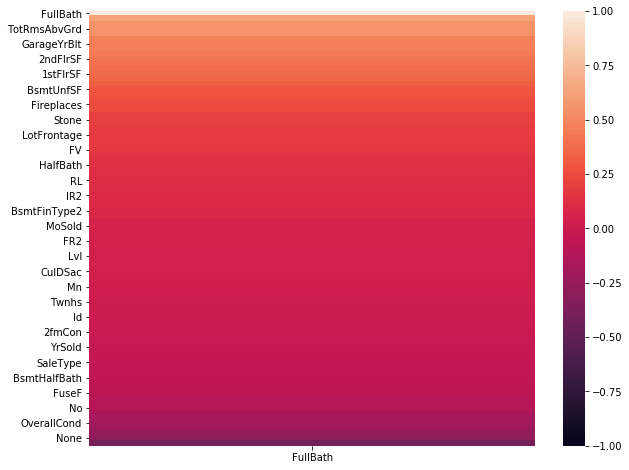

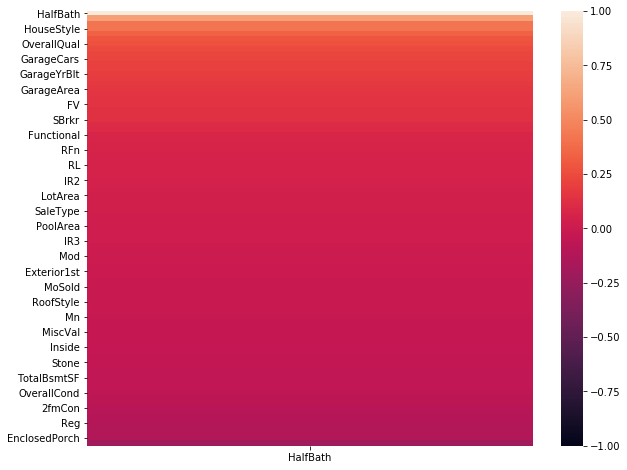

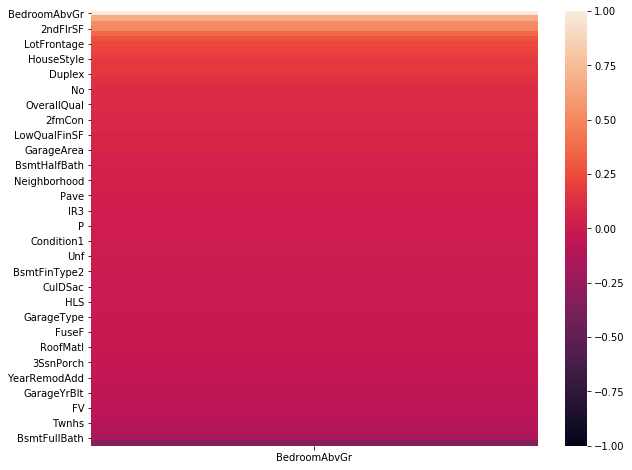

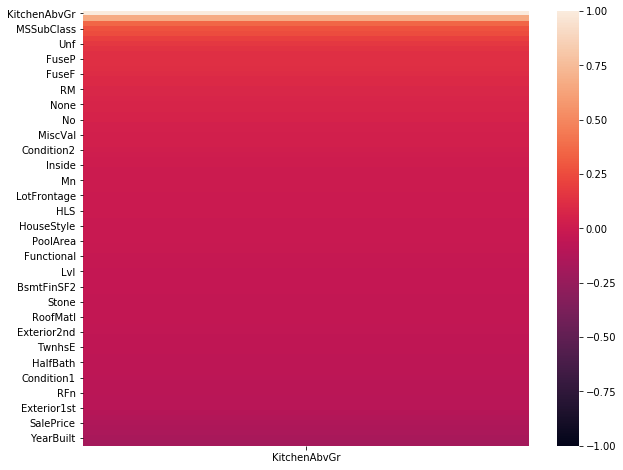

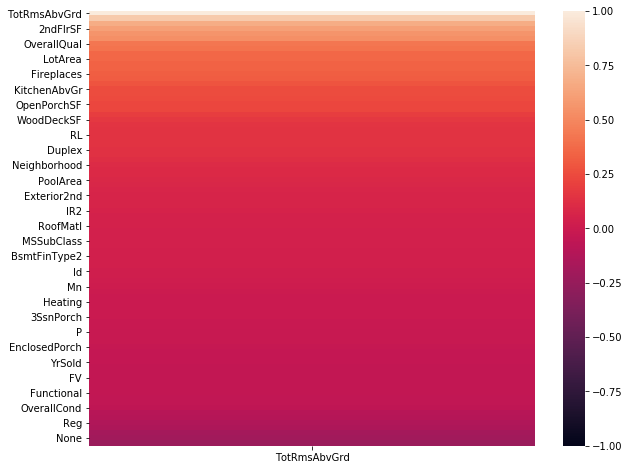

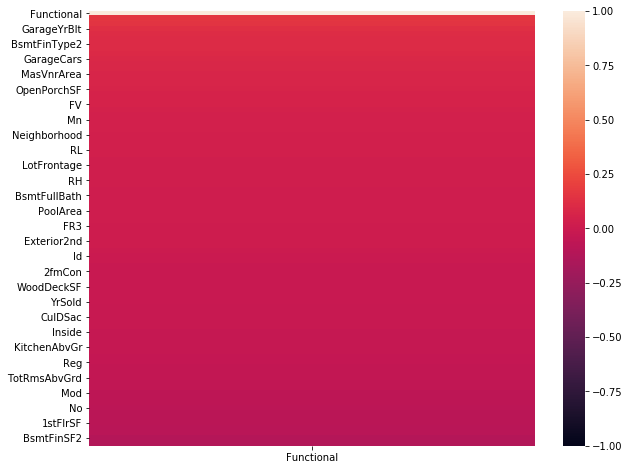

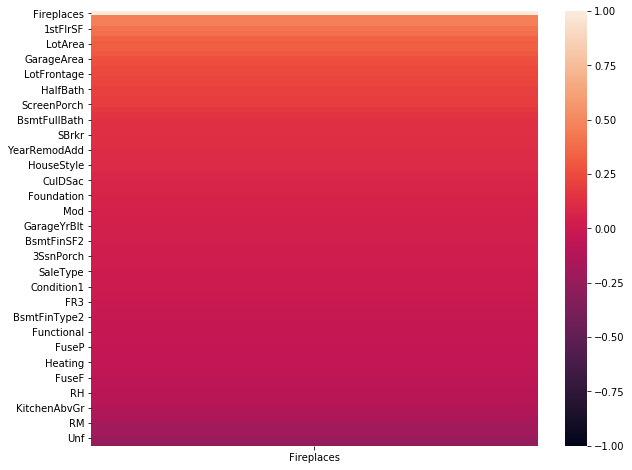

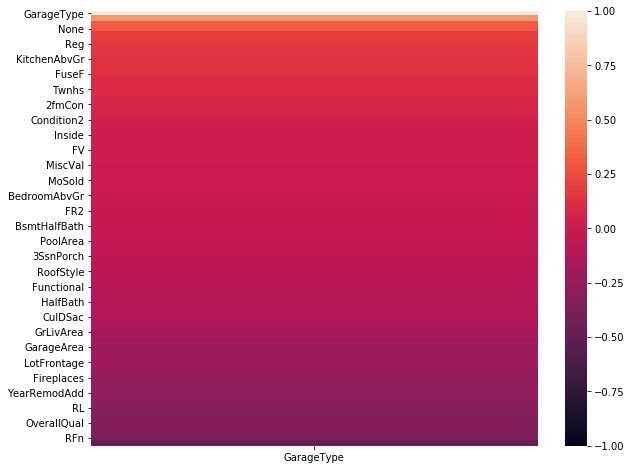

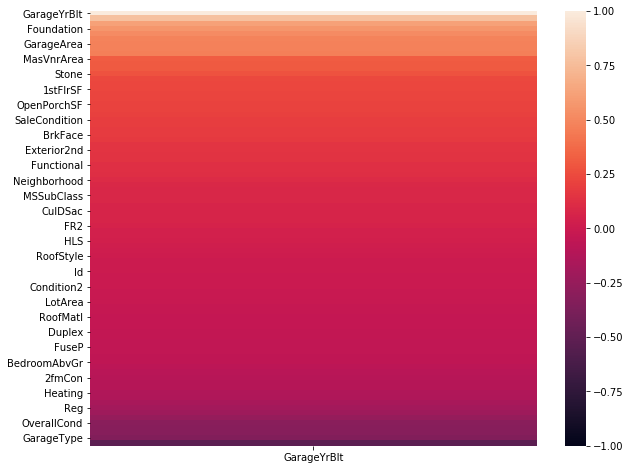

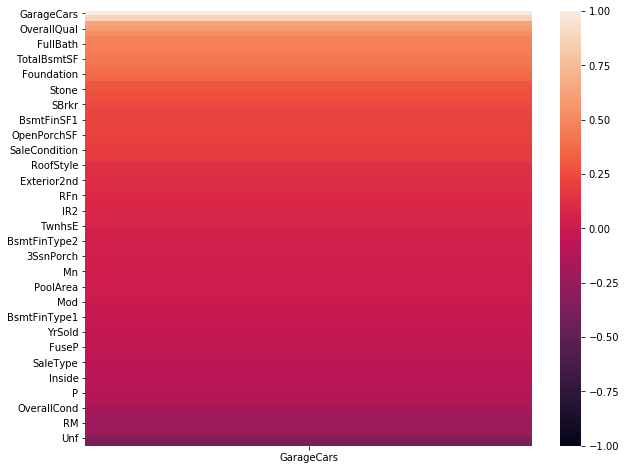

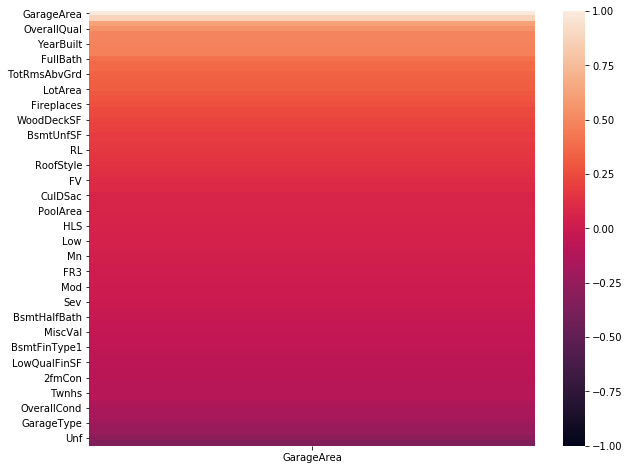

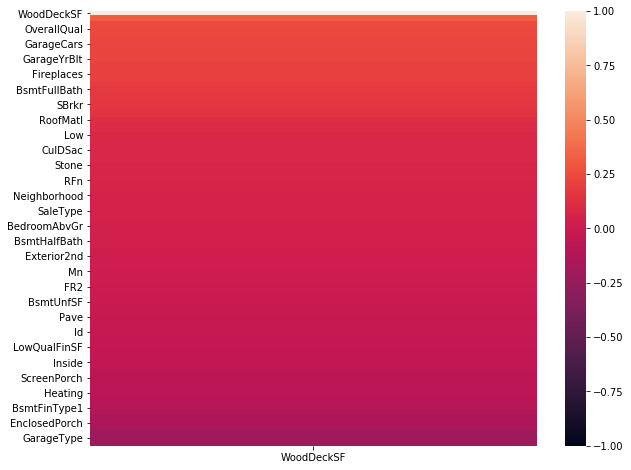

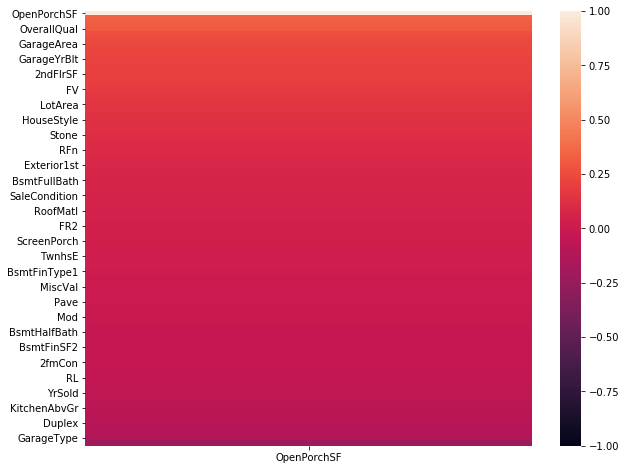

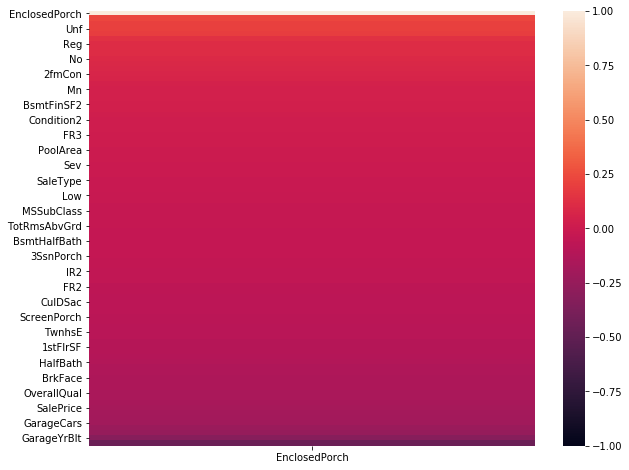

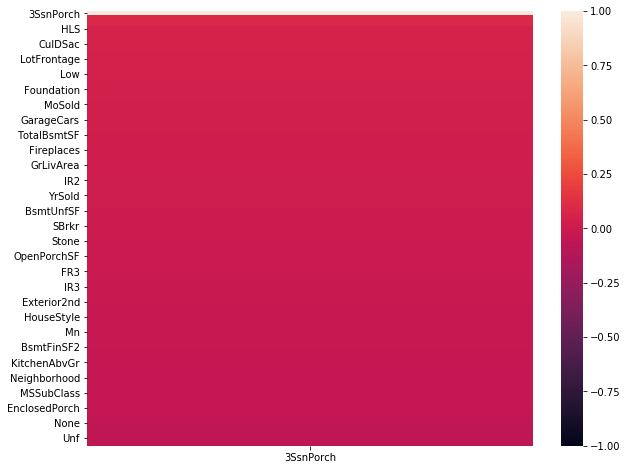

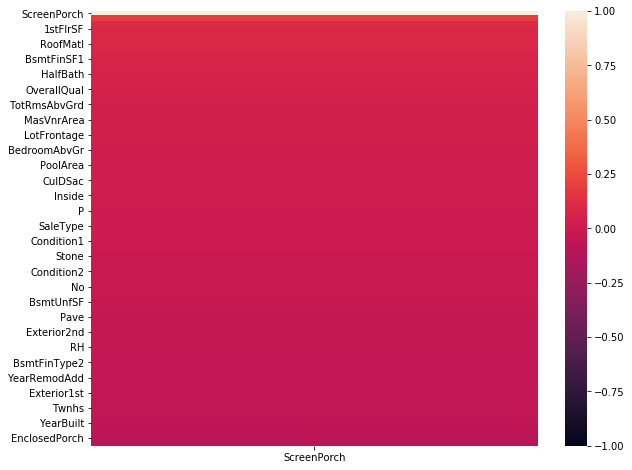

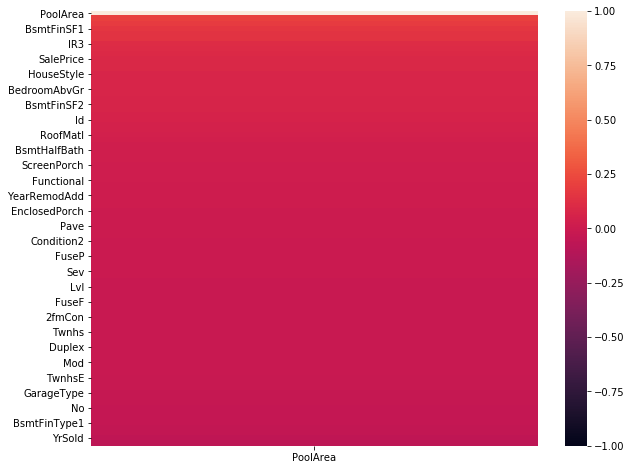

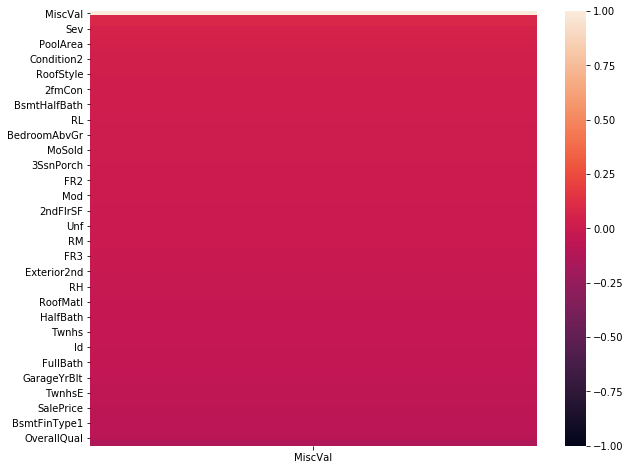

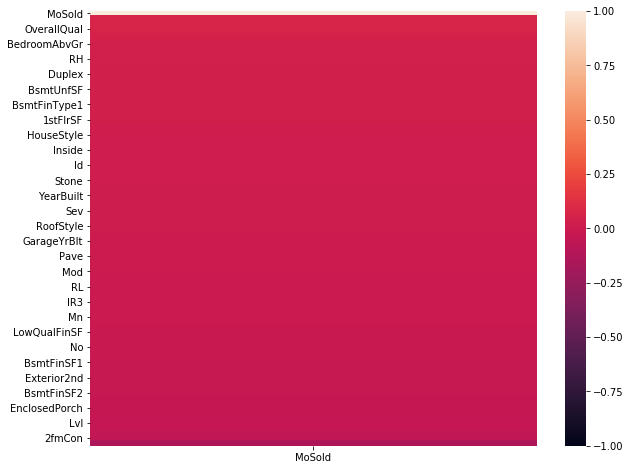

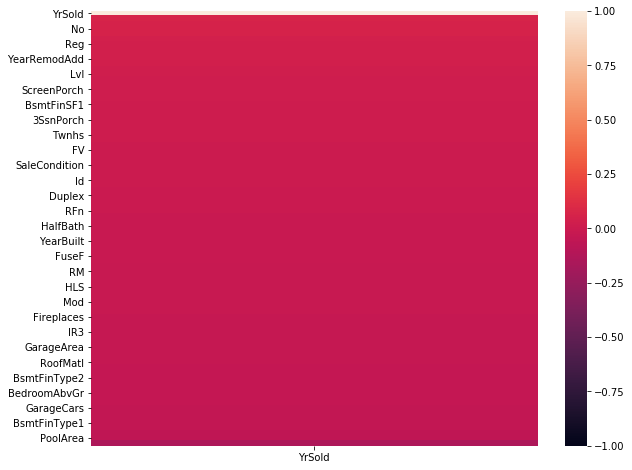

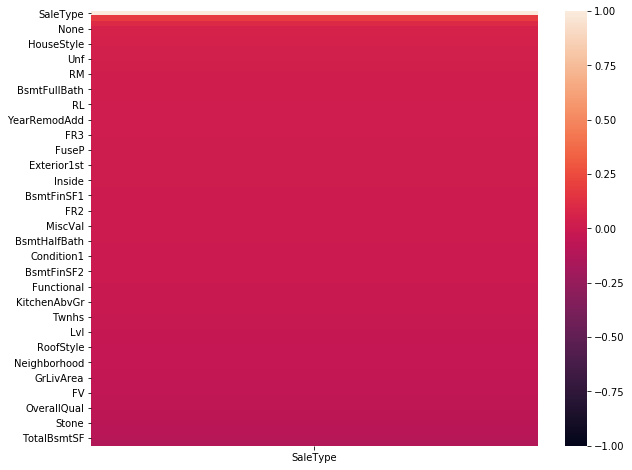

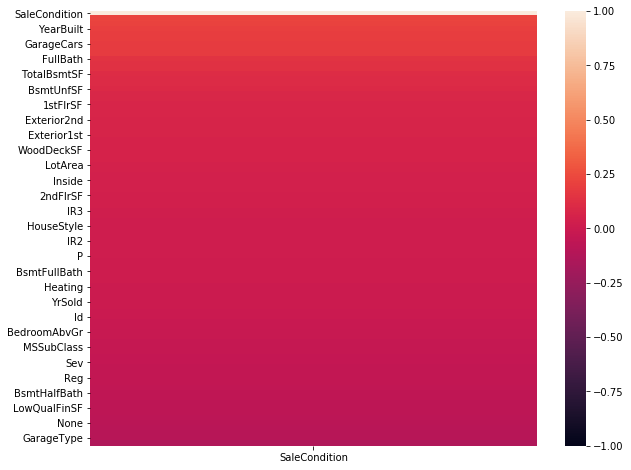

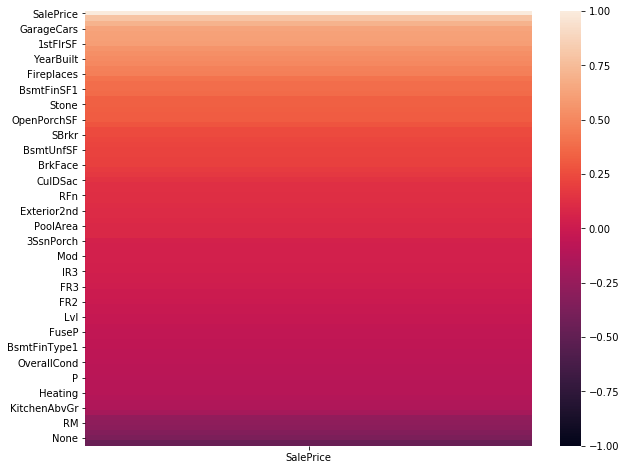

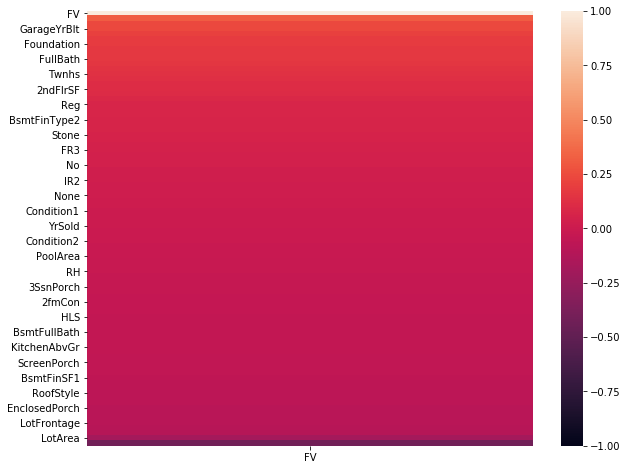

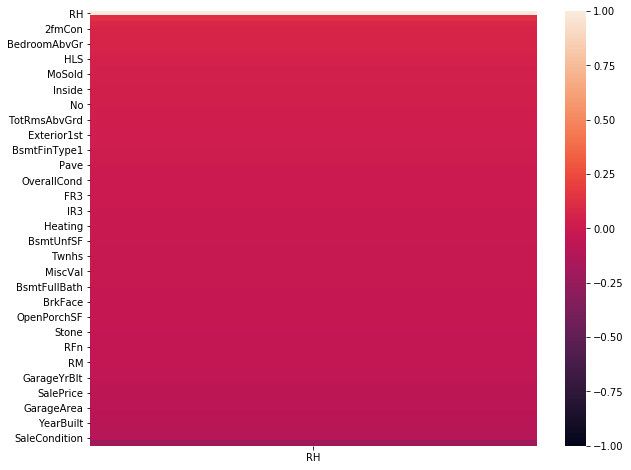

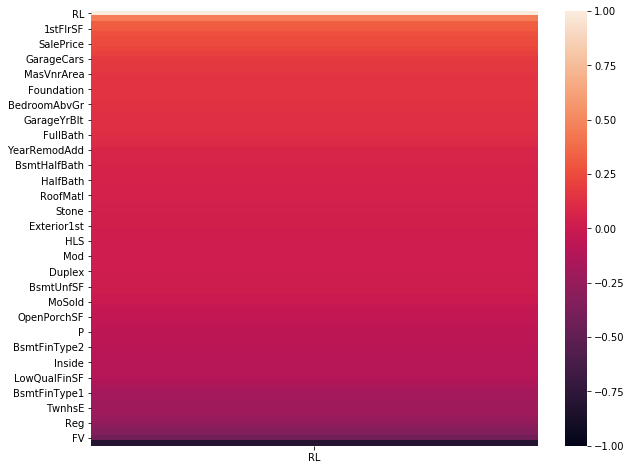

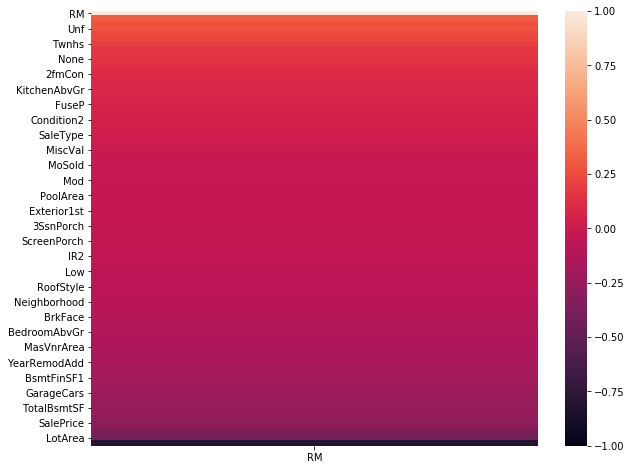

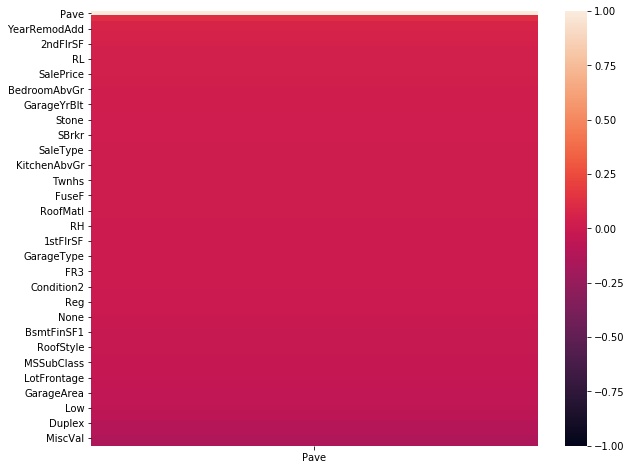

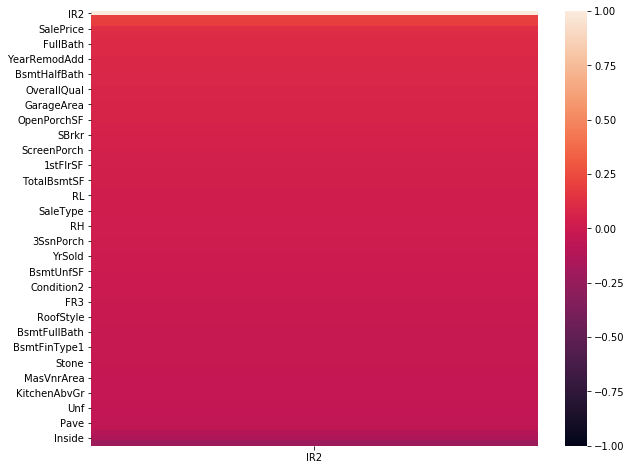

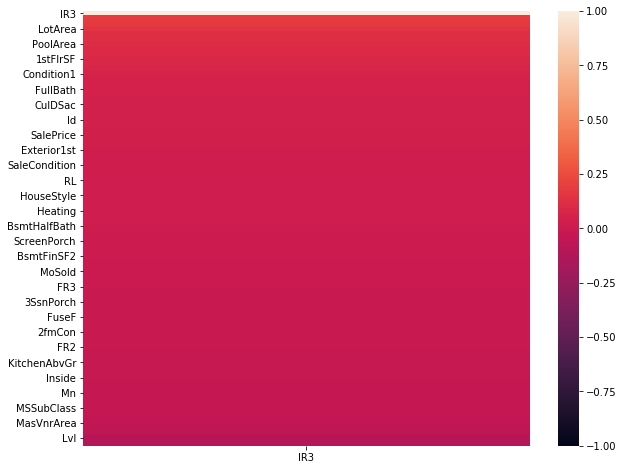

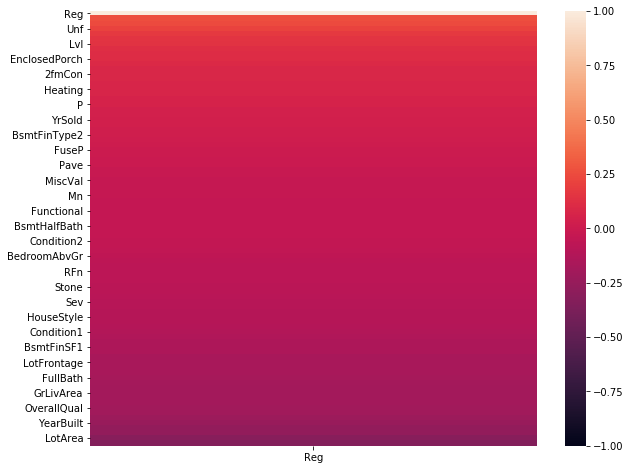

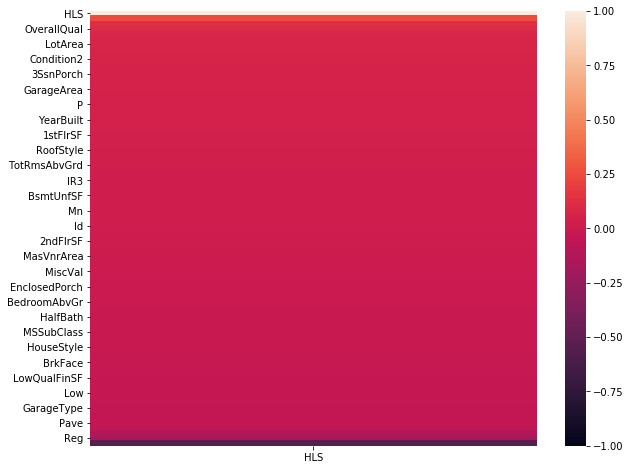

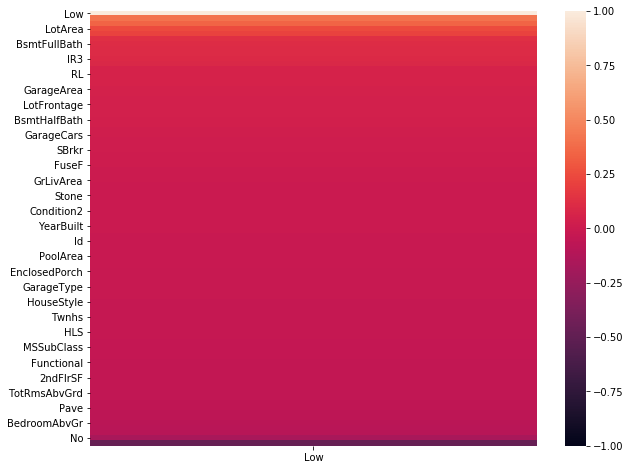

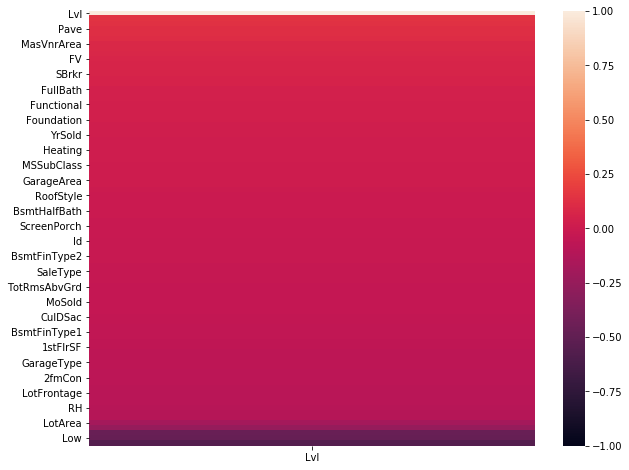

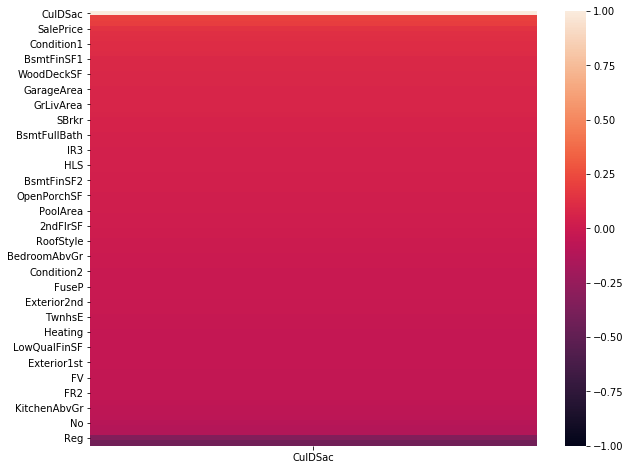

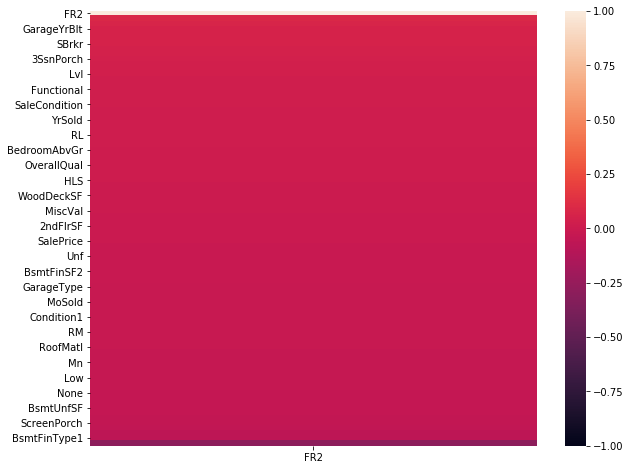

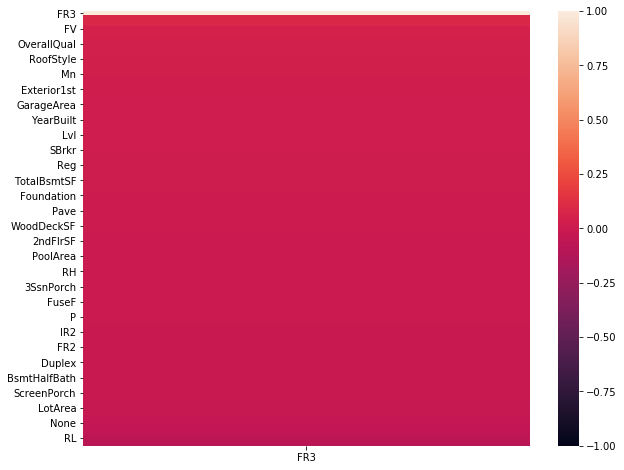

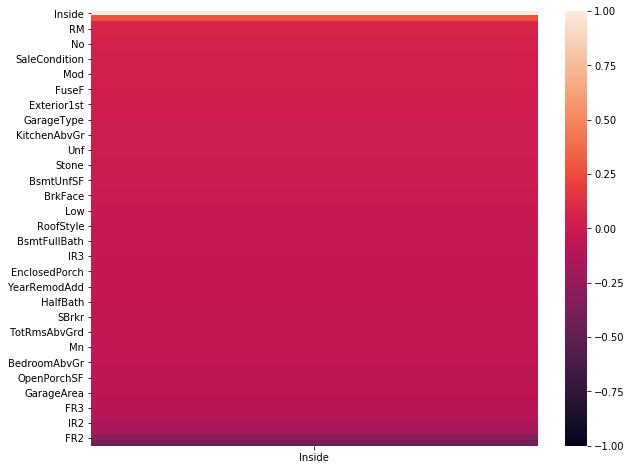

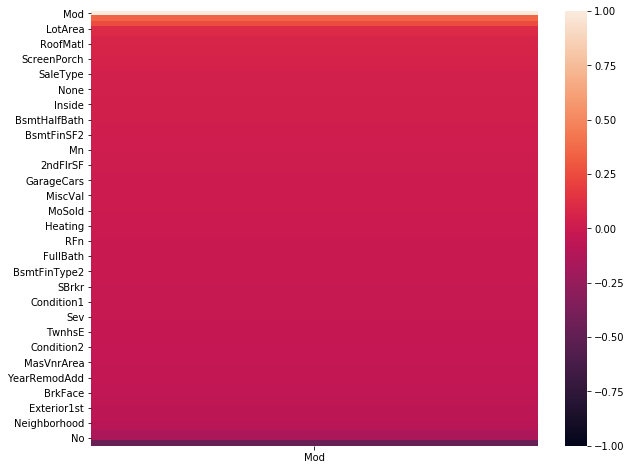

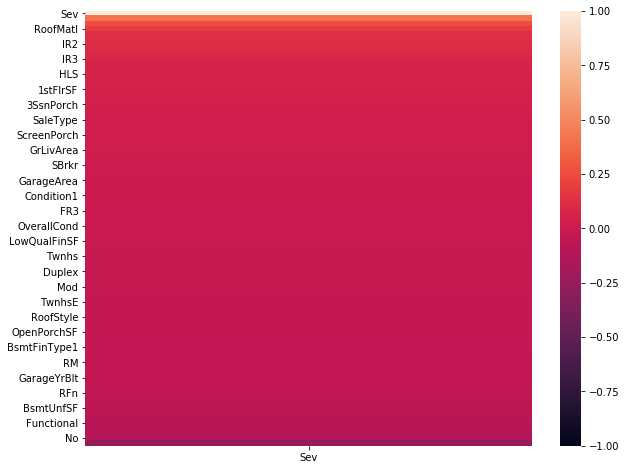

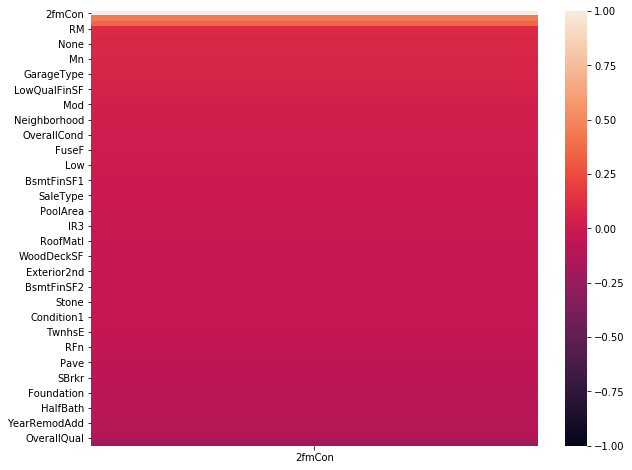

In [15]:
for i,cols in enumerate(data.columns):
    plt.figure(figsize=(10,8))
    corr1=pd.DataFrame(data=correlation[[cols]].sort_values(by=cols,ascending=False)).iloc[:,:10]
    sns.heatmap(corr1,vmin=-1)
    plt.show()
#     print(corr1)
    if i>70:
        break

<a id=8></a>
## Spliting Data

In [16]:
output=data['SalePrice']
data.drop(['SalePrice'],axis=1,inplace=True)

In [17]:
train_data,test_data,train_price,test_price=train_test_split(data.iloc[:,1:],output,test_size=.25,random_state=42)

<a id="9"></a>
# Model selection and evaluation

<a id="10"></a>
## DecisionTreeRegressor

In [18]:
model1=DecisionTreeRegressor(random_state=42)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(8,13)})
grid1.fit(train_data,train_price)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(8, 13)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [19]:
grid1.best_params_

{'max_depth': 9}

In [20]:
regressor1=DecisionTreeRegressor(random_state=42,max_depth=9)
regressor1.fit(train_data,train_price)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [21]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor1.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor1.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor1.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor1.predict(test_data)))

mean_squared_log Train Error is  0.07360310133560985
mean_squared_log Test Error is  0.21045485224527166
r2_score of train data is:- 0.9800703219368724
r2_score of test data is:- 0.7874472940598475


<a id="11"></a>
## RandomForestRegressor

In [22]:
model2=RandomForestRegressor(random_state=42,max_depth=10)
grid2=GridSearchCV(model2,param_grid={'n_estimators':[50,100,150]})
grid2.fit(train_data,train_price)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [23]:
grid2.best_params_

{'n_estimators': 50}

In [24]:
regressor2=RandomForestRegressor(random_state=42,n_estimators=50)
regressor2.fit(train_data,train_price)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor2.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor2.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor2.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor2.predict(test_data)))

mean_squared_log Train Error is  0.0627674755441146
mean_squared_log Test Error is  0.14658120456674723
r2_score of train data is:- 0.9757662105282133
r2_score of test data is:- 0.8951581249099131


<a id="12"></a>
## LinearRegression

In [26]:
regressor3=LinearRegression()
regressor3.fit(train_data,train_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:

print('r2_score of train data is:-',r2_score(train_price,regressor3.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor3.predict(test_data)))

r2_score of train data is:- 0.8346154835757735
r2_score of test data is:- 0.8247342482866635


<a id="13"></a>
## GradientBoostingRegressor

In [28]:
model4=GradientBoostingRegressor(random_state=42)
grid4=GridSearchCV(model4,param_grid={'max_depth':[3,5,7],'tol':[.001,.01,.0001],'learning_rate':[.1,.2,.3]})
grid4.fit(train_data,train_price)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [29]:
grid4.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'tol': 0.001}

In [30]:
regressor4=GradientBoostingRegressor(random_state=42,learning_rate=.2,max_depth=7,tol=.001)
regressor4.fit(train_data,train_price)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor4.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor4.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor4.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor4.predict(test_data)))

mean_squared_log Train Error is  0.0028998380107553307
mean_squared_log Test Error is  0.14077557193304577
r2_score of train data is:- 0.9999690108022441
r2_score of test data is:- 0.891425014348567


<a id="14"></a>
## AdaBoostRegressor

In [32]:
model5=AdaBoostRegressor(random_state=42)
grid5=GridSearchCV(model5,param_grid={'learning_rate':[.1,.5,1,1.5],'n_estimators':[50,100]})
grid5.fit(train_data,train_price)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 1, 1.5],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
grid5.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [34]:
regressor5=AdaBoostRegressor(random_state=42,n_estimators=100,learning_rate=1)
regressor5.fit(train_data,train_price)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
                  n_estimators=100, random_state=42)

In [35]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor5.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor5.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor5.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor5.predict(test_data)))

mean_squared_log Train Error is  0.1876208913853754
mean_squared_log Test Error is  0.21245058640766093
r2_score of train data is:- 0.8697351856795091
r2_score of test data is:- 0.8330084923714562


<a id="15"></a>
## XGBRegressor

In [36]:
model6=XGBRegressor(random_state=42)
grid6=GridSearchCV(model6,param_grid={'n_estimators':[50,100,150],'gamma':[0,.5,1]})
grid6.fit(train_data,train_price)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                     

In [37]:
grid6.best_params_

{'gamma': 0, 'n_estimators': 50}

In [38]:
regressor6=XGBRegressor(random_state=42,n_estimators=50)
regressor6.fit(train_data,train_price)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor6.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor6.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor6.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor6.predict(test_data)))

mean_squared_log Train Error is  0.027105700205396745
mean_squared_log Test Error is  0.13909752148400473
r2_score of train data is:- 0.9972683209886204
r2_score of test data is:- 0.8786535447664051


<a id="16"></a>
## conclusion

### From the above scores it is evident that RandomForestRegressor and GradientBoostingRegressor are some suitable algorithms that can be used in prediction of sale price of housing data.

<a id="17"></a>
## Prediction on test dataset

In [40]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [42]:
drop_missing_columns(test)
removing_missing_value(test)
test.fillna(method='ffill',inplace=True)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [44]:
test=encodings(test)
test=remove_skewness(test)

In [45]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,Unf,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9.078854,12.623029,2.049349,1.995888,2.638794,6.078821,5.553804,...,0.470870,0.006854,0.001371,0.934202,0.030843,0.004112,0.004798,0.959561,0.021933,0.891707
std,421.321334,42.746880,20.561228,0.501942,5.897889,0.879755,0.143385,1.479778,1.436812,1.113740,...,0.499322,0.082533,0.037012,0.248015,0.172952,0.064018,0.069124,0.197053,0.146514,0.310857
min,1461.000000,20.000000,21.000000,7.293698,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,60.000000,8.908154,8.000000,2.000000,2.000000,2.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2190.000000,50.000000,68.580357,9.148465,12.000000,2.000000,2.000000,2.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2554.500000,70.000000,78.000000,9.351710,17.000000,2.000000,2.000000,4.000000,7.000000,6.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2919.000000,190.000000,200.000000,10.943782,24.000000,8.000000,4.000000,6.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
test=delete_duplicate_columns(test)

In [47]:
test_id=test.iloc[:,0]
predicted_price=regressor2.predict(test.iloc[:,1:])

In [48]:
submission=pd.DataFrame({'Id':test_id,'SalePrice':predicted_price})
submission.head()

,Id,SalePrice
0,1461,126024.00
1,1462,156313.00
2,1463,178727.20
3,1464,183614.00
4,1465,206635.12


In [49]:
submission.to_csv('my_submission_r.csv',index=False)